In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re

In [3]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [ ]:
from path import PATH_AUTO_CSV, PATH_AUTO_XLSX

## 1 - Import Data

In [5]:
data = pd.read_csv(PATH_AUTO_CSV)

In [6]:
data2 = data.copy()

In [7]:
data2.head()

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,Portes,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link
0,Fiat,Fiorino,"€ 1 450,-5",Très bon prix,250 000 km,Boîte manuelle,03/2010,Diesel,55 kW (75 CH),Professionnel,5.0,5.0,55 kW (75 CH) Boîte manuelle 1 248 cm³ 5 4 1 0...,"Euro 4 Diesel 4,5 l/100 km (mixte) 123 g/km (m...",Rouge,https://www.autoscout24.be/fr/offres/fiat-fior...
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27 500 km,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5.0,4.0,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...
2,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73 409 km,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5.0,3.0,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...
3,Citroen,C4 Cactus,"€ 6 450,-5",Très bon prix,142 000 km,Boîte manuelle,07/2015,Diesel,73 kW (99 CH),Professionnel,5.0,5.0,73 kW (99 CH) Boîte manuelle 1 560 cm³ 5 4 1 1...,"Euro 6b Diesel 3,4 l/100 km (mixte) 90 g/km (m...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/citroen-c...
4,Audi,Q8 e-tron,"€ 68 950,-1, 5",Très bon prix,22 700 km,534 km,09/2023,Electrique,300 kW (408 CH),Professionnel,5.0,5.0,300 kW (408 CH) Boîte automatique 1 2 585 kg,Électrique 534 km Incluse 0 g/km (comb.),Noir Mythos Black Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-q8-e...


## 2 - EDA

#### 2 - 1 Nan Values

In [8]:
data2.isna().sum()

CarName                        0
 carModele                     0
 CarPrice                      0
 Etat                          0
 Milieage                      0
 Transmission                  0
 Annee                         0
 Carburant                     0
 CarPuissance                  0
 CarVendeur                    0
 Portes                       11
 seats                         5
 Options                       0
 ConsommationEnergétique       0
CouleurGarnissageIntérieur     0
link                           0
dtype: int64

In [9]:
data=data.rename({' carModele': 'carModele', ' CarPrice': 'CarPrice', ' Etat':'Etat', ' Milieage':'Milieage' , ' Transmission':'Transmission', ' Annee':'Annee', ' Carburant':'Carburant', ' CarPuissance':'CarPuissance', ' CarVendeur':'CarVendeur', ' Portes':'Portes', ' seats':'seats', ' Options':'Options',' ConsommationEnergétique':'ConsommationEnergétique'}, axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CarName                     397 non-null    object 
 1   carModele                   397 non-null    object 
 2   CarPrice                    397 non-null    object 
 3   Etat                        397 non-null    object 
 4   Milieage                    397 non-null    object 
 5   Transmission                397 non-null    object 
 6   Annee                       397 non-null    object 
 7   Carburant                   397 non-null    object 
 8   CarPuissance                397 non-null    object 
 9   CarVendeur                  397 non-null    object 
 10  Portes                      386 non-null    float64
 11  seats                       392 non-null    float64
 12  Options                     397 non-null    object 
 13  ConsommationEnergétique     397 non

<Axes: >

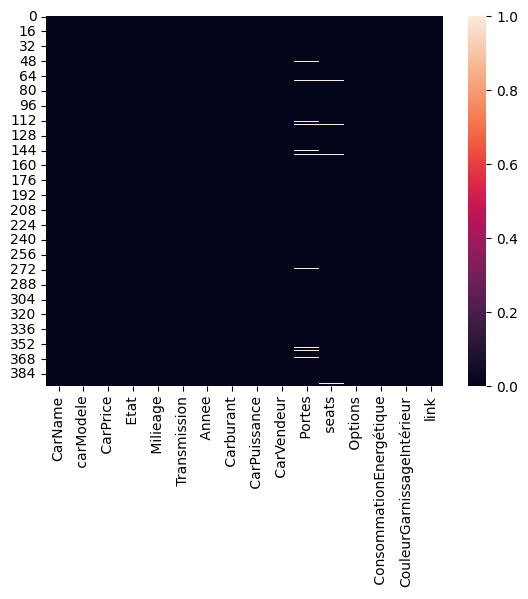

In [11]:
sns.heatmap(data2.isna())

#### 2 - 2 data-info

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CarName                     397 non-null    object 
 1   carModele                   397 non-null    object 
 2   CarPrice                    397 non-null    object 
 3   Etat                        397 non-null    object 
 4   Milieage                    397 non-null    object 
 5   Transmission                397 non-null    object 
 6   Annee                       397 non-null    object 
 7   Carburant                   397 non-null    object 
 8   CarPuissance                397 non-null    object 
 9   CarVendeur                  397 non-null    object 
 10  Portes                      386 non-null    float64
 11  seats                       392 non-null    float64
 12  Options                     397 non-null    object 
 13  ConsommationEnergétique     397 non

#### 2 - 3 Data Cleaning

##### 2 - 3.1 FullCareName

In [13]:
def fillcareName(x,y) :
    return x.upper() + '-' + y.upper()

In [14]:
data2['fillcareName'] = data2.apply(lambda row : fillcareName(row['CarName'], row[' carModele']), axis = 1)

##### 2 - 3.2 CarPrice

In [15]:
def extractPrice(text):
    cleaned_text = re.sub(r'[^\d]', '', text)  
    return int(cleaned_text[:-1]) 

In [16]:
data2['Price'] = data2[' CarPrice'].apply(extractPrice)

##### 2 - 3.3 CarPrice

In [17]:
data2['Price'] = data2[' CarPrice'].apply(extractPrice)

In [18]:
price_mapping = {
    "Très bon prix": 3,
    "Bon prix": 2,
    "Prix correct": 1,
    "Pas d'information": 0
}

In [19]:
data2['etatCategory'] = data2[' Etat'].map(price_mapping)

##### 2 - 3.4 Milieage

In [20]:
def extract_kilometrage(text):
    return int(re.sub(r'[^\d]', '', text))

In [21]:
data2['Milieage'] = data2[' Milieage'].apply(extract_kilometrage) 

##### 2 - 3.5 Annee

In [22]:
data2[' Annee'].unique()

array(['03/2010', '09/2021', '02/2006', '07/2015', '09/2023', '07/2023',
       '08/2015', '03/2011', '05/2013', '10/2024', '10/2015', '11/2012',
       '04/2018', '12/2014', '12/2008', '11/2017', '02/2016', '08/2021',
       '09/2015', '02/2017', '02/2014', '01/2013', '04/2013', '04/2015',
       '01/2019', '01/2012', '03/2015', '07/2013', '02/2012', '12/2015',
       '12/2009', '05/2009', '07/2012', '01/2025', '07/2020', '01/2020',
       '06/2018', '08/2016', '01/2011', '12/2020', '03/2017', '02/2011',
       '09/2016', '08/2018', '01/2023', '06/2005', '12/2011', '10/2012',
       '04/2017', '05/2019', '03/2016', '01/2015', '06/2015', '03/2021',
       '09/2020', '06/2020', '03/2020', '11/2024', '06/2016', '10/2022',
       '09/2008', '02/2020', '01/2017', '09/2017', '07/2022', '10/2023',
       '04/2019', '02/2018', '04/2016', '08/2013', '01/2022', '04/2012',
       '07/2019', '05/2021', '11/2016', '08/2017', '12/2016', '03/2014',
       '01/2021', '07/2010', '12/2017', '05/2016', 

In [23]:
def extract_month(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    months = dates_series.dt.month
    return months

In [24]:
def extract_year(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    year = dates_series.dt.year
    return year

In [25]:
data2[' Month'] = extract_month(data2[' Annee'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2196\3126567526.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


In [26]:
data2[' Year'] = extract_year(data2[' Annee'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2196\39930126.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


###### 2 - 3.6 Options

In [27]:
for i in range(4) :
    print(data2[' Options'][i])

55 kW (75 CH) Boîte manuelle 1 248 cm³ 5 4 1 090 kg 
350 kW (476 CH) Boîte automatique 1 2 254 kg 
55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 154 kg 
73 kW (99 CH) Boîte manuelle 1 560 cm³ 5 4 1 145 kg 


In [31]:
def extract_puissance(text):
    match = re.search(r'(\d{2,3})\s?kW', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Transmission type (manual or automatic)
def extract_transmission(text):
    match = re.search(r'(Boîte .+?)\s(\d)', text)
    if match:
        return match.group(1)  # Return as string
    return None

def extract_cylindree(detail):
    # Extract the cubic centimeters value and remove any spaces or special characters
    match = re.search(r'(\d{1,3}(?:[ ,]\d{3})*)\s*cm³', detail)
    if match:
        # Convert to integer and remove any spaces within the number
        return int(match.group(1).replace(' ', '').replace(',', ''))
    return None

# Function to extract Vitesses (Number of gears)
def extract_vitesses(text):
    match = re.search(r'(\d)\s?(\d)', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Cylindres (Number of cylinders)
def extract_weight(text):
    match = re.search(r'(\d+\s?\d+)\s?kg', text)
    if match:
        return int(match.group(1).replace('\u202f', '').replace(' ', ''))  # Remove special spaces and return as int
    return None

In [32]:
data2['Puissance'] = data2[' Options'].apply(extract_puissance)
data2['TransmissionV2'] = data2[' Options'].apply(extract_transmission)
data2['Cylindrée'] = data2[' Options'].apply(extract_cylindree)
data2['Vitesses'] = data2[' Options'].apply(extract_vitesses)
data2['Cylindres'] = data2[' Options'].apply(extract_weight)

###### 2 - 3.7 HorsePower

In [33]:
def extract_number_ch(text):
    match = re.search(r'\((\d+)\s*CH\)', text) 
    if match:
        return int(match.group(1))  
    return None

In [34]:
data2['HorsePower'] = data2[' CarPuissance'].apply(extract_number_ch)

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
data2['link'][0]

'https://www.autoscout24.be/fr/offres/fiat-fiorino-1-3-multijet-bruit-moteur-export-marchand-diesel-rouge-25e19b4e-38d6-4999-9bf9-e414e95d392b'

In [37]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,Portes,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Milieage,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower
0,Fiat,Fiorino,"€ 1 450,-5",Très bon prix,250 000 km,Boîte manuelle,03/2010,Diesel,55 kW (75 CH),Professionnel,5.0,5.0,55 kW (75 CH) Boîte manuelle 1 248 cm³ 5 4 1 0...,"Euro 4 Diesel 4,5 l/100 km (mixte) 123 g/km (m...",Rouge,https://www.autoscout24.be/fr/offres/fiat-fior...,FIAT-FIORINO,1450,3,250000,3.0,2010.0,55,Boîte manuelle,1248.0,5,1090.0,75
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27 500 km,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5.0,4.0,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,27500,9.0,2021.0,350,Boîte automatique,NaN,3,2254.0,476
2,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73 409 km,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5.0,3.0,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,73409,2.0,2006.0,55,Boîte manuelle,1390.0,5,1154.0,75
3,Citroen,C4 Cactus,"€ 6 450,-5",Très bon prix,142 000 km,Boîte manuelle,07/2015,Diesel,73 kW (99 CH),Professionnel,5.0,5.0,73 kW (99 CH) Boîte manuelle 1 560 cm³ 5 4 1 1...,"Euro 6b Diesel 3,4 l/100 km (mixte) 90 g/km (m...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/citroen-c...,CITROEN-C4 CACTUS,6450,3,142000,7.0,2015.0,73,Boîte manuelle,1560.0,7,1145.0,99
4,Audi,Q8 e-tron,"€ 68 950,-1, 5",Très bon prix,22 700 km,534 km,09/2023,Electrique,300 kW (408 CH),Professionnel,5.0,5.0,300 kW (408 CH) Boîte automatique 1 2 585 kg,Électrique 534 km Incluse 0 g/km (comb.),Noir Mythos Black Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-q8-e...,AUDI-Q8 E-TRON,689501,3,22700,9.0,2023.0,300,Boîte automatique,NaN,3,2585.0,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Mercedes-Benz,GLB 180,"€ 28 290,-1, 5",Pas d'information,31 820 km,Boîte automatique,11/2022,Essence,100 kW (136 CH),Professionnel,5.0,5.0,100 kW (136 CH) Boîte automatique 1 332 cm³ 1,Euro 6d Essence 159 g/km (mixte),"Argent Iridium-silver, metallic paint Métallis...",https://www.autoscout24.be/fr/offres/mercedes-...,MERCEDES-BENZ-GLB 180,282901,0,31820,11.0,2022.0,100,Boîte automatique,1332.0,1,NaN,136
393,Audi,RS6,"€ 79 999,-5",Pas d'information,118 226 km,Boîte automatique,09/2020,Essence,441 kW (600 CH),Professionnel,5.0,5.0,441 kW (600 CH) Boîte automatique 3 996 cm³ 8 ...,"Euro 6d Essence 11,5 l/100 km (mixte) 263 g/km...",Argent Floretzilver Metaalkleur. Métallisé Bru...,https://www.autoscout24.be/fr/offres/audi-rs6-...,AUDI-RS6,79999,0,118226,9.0,2020.0,441,Boîte automatique,3996.0,4,2150.0,600
394,Opel,Insignia,"€ 16 950,-1, 5",Très bon prix,86 802 km,Boîte automatique,08/2021,Diesel,90 kW (122 CH),Professionnel,5.0,NaN,90 kW (122 CH) Boîte automatique 1 496 cm³ 8 3,"Euro 6 Diesel 4,1 l/100 km (mixte) 109 g/km (m...",Gris Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/opel-insi...,OPEL-INSIGNIA,169501,3,86802,8.0,2021.0,90,Boîte automatique,1496.0,9,NaN,122
395,Renault,Megane,"€ 17 900,-5",Bon prix,50 163 km,Boîte automatique,04/2021,Diesel,85 kW (116 CH),Professionnel,5.0,5.0,85 kW (116 CH) Boîte automatique 1 461 cm³ 7 4...,"Euro 6 Diesel 3,9 l/100 km (mixte) 104 g/km (m...",Noir Autres Noir Alcantara,https://www.autoscout24.be/fr/offres/renault-m...,RENAULT-MEGANE,17900,2,50163,4.0,2021.0,85,Boîte automatique,1461.0,8,1422.0,116


In [38]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,Portes,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Milieage,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower
0,Fiat,Fiorino,"€ 1 450,-5",Très bon prix,250 000 km,Boîte manuelle,03/2010,Diesel,55 kW (75 CH),Professionnel,5.0,5.0,55 kW (75 CH) Boîte manuelle 1 248 cm³ 5 4 1 0...,"Euro 4 Diesel 4,5 l/100 km (mixte) 123 g/km (m...",Rouge,https://www.autoscout24.be/fr/offres/fiat-fior...,FIAT-FIORINO,1450,3,250000,3.0,2010.0,55,Boîte manuelle,1248.0,5,1090.0,75
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27 500 km,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5.0,4.0,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,27500,9.0,2021.0,350,Boîte automatique,NaN,3,2254.0,476
2,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73 409 km,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5.0,3.0,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,73409,2.0,2006.0,55,Boîte manuelle,1390.0,5,1154.0,75
3,Citroen,C4 Cactus,"€ 6 450,-5",Très bon prix,142 000 km,Boîte manuelle,07/2015,Diesel,73 kW (99 CH),Professionnel,5.0,5.0,73 kW (99 CH) Boîte manuelle 1 560 cm³ 5 4 1 1...,"Euro 6b Diesel 3,4 l/100 km (mixte) 90 g/km (m...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/citroen-c...,CITROEN-C4 CACTUS,6450,3,142000,7.0,2015.0,73,Boîte manuelle,1560.0,7,1145.0,99
4,Audi,Q8 e-tron,"€ 68 950,-1, 5",Très bon prix,22 700 km,534 km,09/2023,Electrique,300 kW (408 CH),Professionnel,5.0,5.0,300 kW (408 CH) Boîte automatique 1 2 585 kg,Électrique 534 km Incluse 0 g/km (comb.),Noir Mythos Black Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-q8-e...,AUDI-Q8 E-TRON,689501,3,22700,9.0,2023.0,300,Boîte automatique,NaN,3,2585.0,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Mercedes-Benz,GLB 180,"€ 28 290,-1, 5",Pas d'information,31 820 km,Boîte automatique,11/2022,Essence,100 kW (136 CH),Professionnel,5.0,5.0,100 kW (136 CH) Boîte automatique 1 332 cm³ 1,Euro 6d Essence 159 g/km (mixte),"Argent Iridium-silver, metallic paint Métallis...",https://www.autoscout24.be/fr/offres/mercedes-...,MERCEDES-BENZ-GLB 180,282901,0,31820,11.0,2022.0,100,Boîte automatique,1332.0,1,NaN,136
393,Audi,RS6,"€ 79 999,-5",Pas d'information,118 226 km,Boîte automatique,09/2020,Essence,441 kW (600 CH),Professionnel,5.0,5.0,441 kW (600 CH) Boîte automatique 3 996 cm³ 8 ...,"Euro 6d Essence 11,5 l/100 km (mixte) 263 g/km...",Argent Floretzilver Metaalkleur. Métallisé Bru...,https://www.autoscout24.be/fr/offres/audi-rs6-...,AUDI-RS6,79999,0,118226,9.0,2020.0,441,Boîte automatique,3996.0,4,2150.0,600
394,Opel,Insignia,"€ 16 950,-1, 5",Très bon prix,86 802 km,Boîte automatique,08/2021,Diesel,90 kW (122 CH),Professionnel,5.0,NaN,90 kW (122 CH) Boîte automatique 1 496 cm³ 8 3,"Euro 6 Diesel 4,1 l/100 km (mixte) 109 g/km (m...",Gris Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/opel-insi...,OPEL-INSIGNIA,169501,3,86802,8.0,2021.0,90,Boîte automatique,1496.0,9,NaN,122
395,Renault,Megane,"€ 17 900,-5",Bon prix,50 163 km,Boîte automatique,04/2021,Diesel,85 kW (116 CH),Professionnel,5.0,5.0,85 kW (116 CH) Boîte automatique 1 461 cm³ 7 4...,"Euro 6 Diesel 3,9 l/100 km (mixte) 104 g/km (m...",Noir Autres Noir Alcantara,https://www.autoscout24.be/fr/offres/renault-m...,RENAULT-MEGANE,17900,2,50163,4.0,2021.0,85,Boîte automatique,1461.0,8,1422.0,116


In [39]:
def extract_emission_class(text):
    match = re.search(r'(Euro \d+[a-z]*)', text)
    return match.group(1) if match else None

def extract_fuel_type(text):
    match = re.search(r'(Diesel|Essence|Électrique)', text, re.IGNORECASE)
    return match.group(1) if match else None

def extract_fuel_consumption(text):
    match = re.search(r'(\d+,?\d*) l/100 km', text)
    return match.group(1).replace(',', '.') if match else None

def extract_co2_emissions(text):
    match = re.search(r'(\d+) g/km', text)
    return int(match.group(1)) if match else None

In [40]:
data2["ClasseEmission"] = data2[' ConsommationEnergétique'].apply(extract_emission_class)
data2["Typedecarburant"] = data2[' ConsommationEnergétique'].apply(extract_fuel_type)
data2["Consommationdecarburant"] = data2[' ConsommationEnergétique'].apply(extract_fuel_consumption)
data2["ÉmissionsdeCO2"] = data2[' ConsommationEnergétique'].apply(extract_co2_emissions)

In [41]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,Portes,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Milieage,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Fiat,Fiorino,"€ 1 450,-5",Très bon prix,250 000 km,Boîte manuelle,03/2010,Diesel,55 kW (75 CH),Professionnel,5.0,5.0,55 kW (75 CH) Boîte manuelle 1 248 cm³ 5 4 1 0...,"Euro 4 Diesel 4,5 l/100 km (mixte) 123 g/km (m...",Rouge,https://www.autoscout24.be/fr/offres/fiat-fior...,FIAT-FIORINO,1450,3,250000,3.0,2010.0,55,Boîte manuelle,1248.0,5,1090.0,75,Euro 4,Diesel,4.5,123.0
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27 500 km,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5.0,4.0,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,27500,9.0,2021.0,350,Boîte automatique,NaN,3,2254.0,476,None,Électrique,None,0.0
2,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73 409 km,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5.0,3.0,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,73409,2.0,2006.0,55,Boîte manuelle,1390.0,5,1154.0,75,Euro 4,Essence,6.8,166.0
3,Citroen,C4 Cactus,"€ 6 450,-5",Très bon prix,142 000 km,Boîte manuelle,07/2015,Diesel,73 kW (99 CH),Professionnel,5.0,5.0,73 kW (99 CH) Boîte manuelle 1 560 cm³ 5 4 1 1...,"Euro 6b Diesel 3,4 l/100 km (mixte) 90 g/km (m...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/citroen-c...,CITROEN-C4 CACTUS,6450,3,142000,7.0,2015.0,73,Boîte manuelle,1560.0,7,1145.0,99,Euro 6b,Diesel,3.4,90.0
4,Audi,Q8 e-tron,"€ 68 950,-1, 5",Très bon prix,22 700 km,534 km,09/2023,Electrique,300 kW (408 CH),Professionnel,5.0,5.0,300 kW (408 CH) Boîte automatique 1 2 585 kg,Électrique 534 km Incluse 0 g/km (comb.),Noir Mythos Black Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-q8-e...,AUDI-Q8 E-TRON,689501,3,22700,9.0,2023.0,300,Boîte automatique,NaN,3,2585.0,408,None,Électrique,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Mercedes-Benz,GLB 180,"€ 28 290,-1, 5",Pas d'information,31 820 km,Boîte automatique,11/2022,Essence,100 kW (136 CH),Professionnel,5.0,5.0,100 kW (136 CH) Boîte automatique 1 332 cm³ 1,Euro 6d Essence 159 g/km (mixte),"Argent Iridium-silver, metallic paint Métallis...",https://www.autoscout24.be/fr/offres/mercedes-...,MERCEDES-BENZ-GLB 180,282901,0,31820,11.0,2022.0,100,Boîte automatique,1332.0,1,NaN,136,Euro 6d,Essence,None,159.0
393,Audi,RS6,"€ 79 999,-5",Pas d'information,118 226 km,Boîte automatique,09/2020,Essence,441 kW (600 CH),Professionnel,5.0,5.0,441 kW (600 CH) Boîte automatique 3 996 cm³ 8 ...,"Euro 6d Essence 11,5 l/100 km (mixte) 263 g/km...",Argent Floretzilver Metaalkleur. Métallisé Bru...,https://www.autoscout24.be/fr/offres/audi-rs6-...,AUDI-RS6,79999,0,118226,9.0,2020.0,441,Boîte automatique,3996.0,4,2150.0,600,Euro 6d,Essence,11.5,263.0
394,Opel,Insignia,"€ 16 950,-1, 5",Très bon prix,86 802 km,Boîte automatique,08/2021,Diesel,90 kW (122 CH),Professionnel,5.0,NaN,90 kW (122 CH) Boîte automatique 1 496 cm³ 8 3,"Euro 6 Diesel 4,1 l/100 km (mixte) 109 g/km (m...",Gris Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/opel-insi...,OPEL-INSIGNIA,169501,3,86802,8.0,2021.0,90,Boîte automatique,1496.0,9,NaN,122,Euro 6,Diesel,4.1,109.0
395,Renault,Megane,"€ 17 900,-5",Bon prix,50 163 km,Boîte automatique,04/2021,Diesel,85 kW (116 CH),Professionnel,5.0,5.0,85 kW (116 CH) Boîte automatique 1 461 cm³ 7 4...,"Euro 6 Diesel 3,9 l/100 km (mixte) 104 g/km (m...",Noir A

In [42]:
data2.drop(["CarName", " carModele", " CarPrice", " Annee", " CarPuissance", " Options", "link", "CouleurGarnissageIntérieur", " ConsommationEnergétique", " Transmission"], axis = 1, inplace=True)

In [43]:
data2

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,fillcareName,Price,etatCategory,Milieage,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Très bon prix,250 000 km,Diesel,Professionnel,5.0,5.0,FIAT-FIORINO,1450,3,250000,3.0,2010.0,55,Boîte manuelle,1248.0,5,1090.0,75,Euro 4,Diesel,4.5,123.0
1,Bon prix,27 500 km,Electrique,Professionnel,5.0,4.0,AUDI-E-TRON GT,599501,2,27500,9.0,2021.0,350,Boîte automatique,NaN,3,2254.0,476,None,Électrique,None,0.0
2,Très bon prix,73 409 km,Essence,Professionnel,5.0,3.0,VOLKSWAGEN-GOLF,4000,3,73409,2.0,2006.0,55,Boîte manuelle,1390.0,5,1154.0,75,Euro 4,Essence,6.8,166.0
3,Très bon prix,142 000 km,Diesel,Professionnel,5.0,5.0,CITROEN-C4 CACTUS,6450,3,142000,7.0,2015.0,73,Boîte manuelle,1560.0,7,1145.0,99,Euro 6b,Diesel,3.4,90.0
4,Très bon prix,22 700 km,Electrique,Professionnel,5.0,5.0,AUDI-Q8 E-TRON,689501,3,22700,9.0,2023.0,300,Boîte automatique,NaN,3,2585.0,408,None,Électrique,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Pas d'information,31 820 km,Essence,Professionnel,5.0,5.0,MERCEDES-BENZ-GLB 180,282901,0,31820,11.0,2022.0,100,Boîte automatique,1332.0,1,NaN,136,Euro 6d,Essence,None,159.0
393,Pas d'information,118 226 km,Essence,Professionnel,5.0,5.0,AUDI-RS6,79999,0,118226,9.0,2020.0,441,Boîte automatique,3996.0,4,2150.0,600,Euro 6d,Essence,11.5,263.0
394,Très bon prix,86 802 km,Diesel,Professionnel,5.0,NaN,OPEL-INSIGNIA,169501,3,86802,8.0,2021.0,90,Boîte automatique,1496.0,9,NaN,122,Euro 6,Diesel,4.1,109.0
395,Bon prix,50 163 km,Diesel,Professionnel,5.0,5.0,RENAULT-MEGANE,17900,2,50163,4.0,2021.0,85,Boîte automatique,1461.0,8,1422.0,116,Euro 6,Diesel,3.9,104.0


#### Save the clean data

In [ ]:
from paths import PATH_PROCESSED_CSV 
import csv

In [45]:
data2.to_csv(PATH_PROCESSED_CSV, index=False, encoding='utf-8')